In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
df = pd.read_csv('bikes.csv', index_col=0)
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,spring,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,spring,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,spring,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,spring,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [3]:
df.set_index('instant')

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,27-12-2019,spring,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,28-12-2019,spring,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,29-12-2019,spring,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341


In [4]:
df.dtypes

instant         int64
dteday         object
season         object
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

    'dteday' podría cambiarse a tipo datetime. Revisar si la queremos eliminar antes de cambiarla.

In [5]:
df.shape

(730, 16)

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000


In [21]:
df_numericas = df.select_dtypes(include=np.number)
df_numericas.shape

(730, 14)

In [23]:
df_numericas.set_index('instant')

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,
1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341


## OUTLIERS

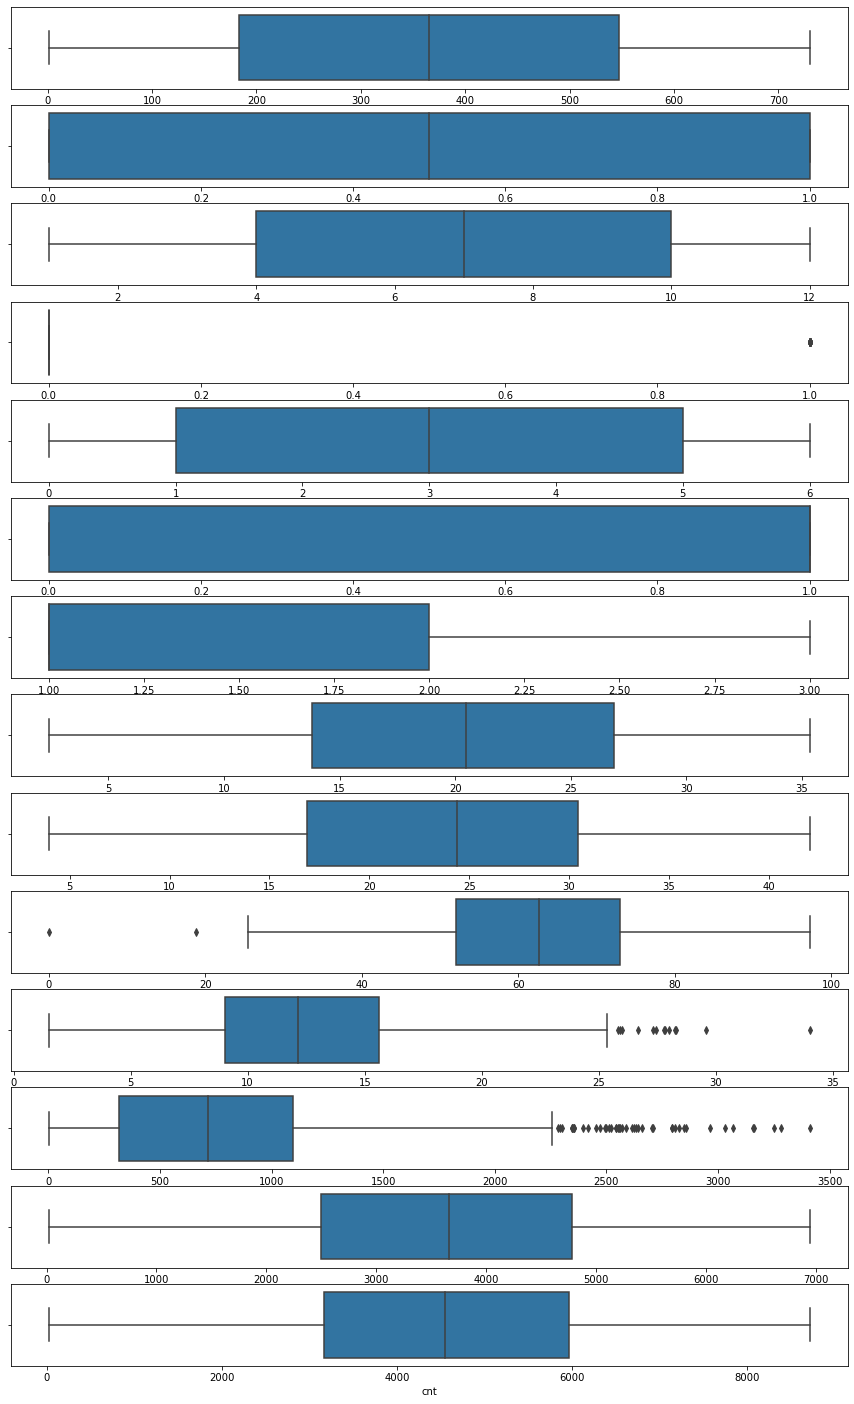

In [26]:
fig, axes = plt.subplots(14, 1, figsize=(15,25))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x = df_numericas.columns[i], data = df, ax=axes[i]); # para trazar una línea de densidad

plt.show()

    Podemos observar que solo tenemos outliers en 3 columnas (hum, windspeed, casual y holiday)

In [28]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [32]:
lista_columnas = list(df_numericas.columns)
indices = detectar_outliers(lista_columnas, df)

In [33]:
indices

{'holiday': [16,
  51,
  104,
  149,
  184,
  247,
  282,
  314,
  327,
  359,
  366,
  380,
  415,
  470,
  512,
  549,
  610,
  645,
  680,
  690,
  723],
 'hum': [49, 68],
 'windspeed': [44, 49, 93, 94, 292, 382, 407, 420, 431, 432, 449, 665, 720],
 'casual': [148,
  183,
  184,
  196,
  246,
  281,
  440,
  446,
  454,
  455,
  461,
  468,
  469,
  475,
  489,
  496,
  503,
  504,
  510,
  511,
  512,
  517,
  518,
  524,
  531,
  532,
  538,
  539,
  549,
  559,
  567,
  580,
  594,
  608,
  609,
  616,
  622,
  629,
  630,
  636,
  643,
  657,
  664,
  679]}

    Comprobamos que dos de las variables tienen poco outliers por lo que, podríamos mirar en describe cual seria el mejor estadístico para reemplazarlos.

In [ ]:
for key, values in indices.items():
    media = df[key].mean() 
    median = df[key].median()
    if key == "holiday" or key == "hum" or key == 'windspeed':
        for i in values: 
            df.loc[i,key] = media 
    else:
        df.loc[i,key] = median 

In [ ]:
#df_numericas[''], lambda_ajustada = stats.boxcox(df_numericas['SalePrice'])

In [ ]:
#lambda_ajustada

In [ ]:
#df_numericas.head()

In [ ]:
# lambdas = [] # creamos una lista vacía para ir almacenando los valores de la lambdas

# for col in df_numericas.columns:
#     try:
#         df_numericas[col], lambda_ = stats.boxcox(df_numericas[col])
#         lambdas.append(lambda_)
#         print(f'esta {col} si')
#     except:
#         print(f'no se pudo hacer la transforamción de {col}')

In [ ]:
#df_numericas.head()

In [ ]:
# fig, axes = plt.subplots(1, 2, figsize = (15,5))

# axes[0].set_title('SalePrice original')
# axes[1].set_title('SalePrice normalizado')

# sns.distplot(df['mnth'] ,ax = axes[0])
# sns.distplot(df_numericas['mnth'], ax = axes[1]);

In [ ]:
# my_dict = {'ABC': [34.54, 34.345, 34.761], 'DEF': [34.541, 34.748, 34.482]}

# fig, ax = plt.subplots()
# ax.boxplot(my_dict.values())
# ax.set_xticklabels(my_dict.keys())

In [ ]:
# fig = plt.figure(1, figsize=(6,10))
# ax = fig.add_subplot(111)
# boxplot = ax.boxplot(df)
# for flier in boxplot['fliers']:
#     flier.set(marker='o', color='red', alpha=0.5)